In [1]:
protein = "MAHVRGLQLPGCLALAALCSLVHSQHVFLAPQQARSLLQRVRRANTFLEEVRKGNLERECVEETCSYEEAFEALESSTATDVFWAKYTACETARTPRDKLAACLEGNCAEGLGTNYRGHVNITRSGIECQLWRSRYPHKPEINSTTHPGADLQENFCRNPDSSTTGPWCYTTDPTVRRQECSIPVCGQDQVTVAMTPRSEGSSVNLSPPLEQCVPDRGQQYQGRLAVTTHGLPCLAWASAQAKALSKHQDFNSAVQLVENFCRNPDGDEEGVWCYVAGKPGDFGYCDLNYCEEAVEEETGDGLDEDSDRAIEGRTATSEYQTFFNPRTFGSGEADCGLRPLFEKKSLEDKTERELLESYIDGRIVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLLYPPWDKNFTENDLLVRIGKHSRTRYERNIEKISMLEKIYIHPRYNWRENLDRDIALMKLKKPVAFSDYIHPVCLPDRETAASLLQAGYKGRVTGWGNLKETWTANVGKGQPSVLQVVNLPIVERPVCKDSTRIRITDNMFCAGYKPDEGKRGDACEGDSGGPFVMKSPFNNRWYQMGIVSWGEGCDRDGKYGFYTHVFRLKKWIQKVIDQFGE"
from disassembly.simulate_proteolysis import simulate_proteolysis, simulate_proteolysis_no_graph, enzyme_set, enzyme

n_generate = 500

k_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1, 0, 0],  # activities
    [1, 0, 0],  # abundances
)

kr_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [0, 1, 0],  # activities
    [0, 1, 0],  # abundances
)

viat_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [0, 0, 1],  # activities
    [0, 0, 1],  # abundances
)

krviat_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [0, 1, 1],  # activities
    [0, 1, 1],  # abundances
)

In [2]:
generated_peptidomes = {"name": [], "peptidome": []}

names = ["k", "kr", "krviat", "viat"]

i = 0
for enz, name in zip([k_enzymes, kr_enzymes, krviat_enzymes, viat_enzymes], names):
    for i in range(5):
        generated_peptidome  = simulate_proteolysis_no_graph(
            protein,
            n_start=1,
            n_generate=n_generate,
            endo_or_exo_probability=[0.9, 0.1],
            enzymes=enz,
        )
        generated_peptidomes["name"].append(f"{name}_{i}")
        generated_peptidomes["peptidome"].append(generated_peptidome)

 499 / 500 (1883)
74 unique peptides. 501 total
 499 / 500 (3543)
117 unique peptides. 501 total
 499 / 500 (2848)
108 unique peptides. 501 total
 499 / 500 (2164)
99 unique peptides. 501 total
 499 / 500 (2949)
106 unique peptides. 501 total
 499 / 500 (2599)
185 unique peptides. 501 total
 499 / 500 (2402)
195 unique peptides. 501 total
 499 / 500 (2468)
235 unique peptides. 501 total
 499 / 500 (4116)
203 unique peptides. 501 total
 499 / 500 (2918)
178 unique peptides. 501 total
 499 / 500 (3533)
328 unique peptides. 501 total
 499 / 500 (2307)
237 unique peptides. 501 total
 499 / 500 (3319)
266 unique peptides. 501 total
 499 / 500 (2450)
330 unique peptides. 501 total
 499 / 500 (2816)
308 unique peptides. 501 total
 499 / 500 (3186)
263 unique peptides. 501 total
 499 / 500 (2755)
310 unique peptides. 501 total
 499 / 500 (2635)
237 unique peptides. 501 total
 499 / 500 (3051)
275 unique peptides. 501 total
 499 / 500 (2488)
262 unique peptides. 501 total


In [3]:
from disassembly.util import KL, normalize_dict
import numpy as np


def error(p, q):
    p = np.asarray(list(p))
    q = np.asarray(list(q))
    return np.sum((p - q) ** 2)


def compare(P, generated):
    P = normalize_dict(P)
    generated = normalize_dict(generated)
    P_vec = []
    generated_vec = []
    for key in P.keys():
        P_vec.append(P[key])
        if key in generated.keys():
            generated_vec.append(generated[key])
        else:
            generated_vec.append(0)
    for key in generated.keys():
        if key not in P.keys():
            P_vec.append(0)
            generated_vec.append(generated[key])
    return P_vec, generated_vec


comparisons = {}
for i in range(len(generated_peptidomes["peptidome"])):
    name_comp_1 = generated_peptidomes["name"][i]
    peptidome_comp_1 = generated_peptidomes["peptidome"][i]
    comparisons[name_comp_1] = {}
    for j in range(len(generated_peptidomes["peptidome"])):
        name_comp_2 = generated_peptidomes["name"][j]
        peptidome_comp_2 = generated_peptidomes["peptidome"][j]
        p, q = compare(peptidome_comp_1, peptidome_comp_2)
        err = KL(p, q) + KL(q, p)
        comparisons[name_comp_1][name_comp_2] = err

import pandas as pd

comps_df = pd.DataFrame(comparisons)

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


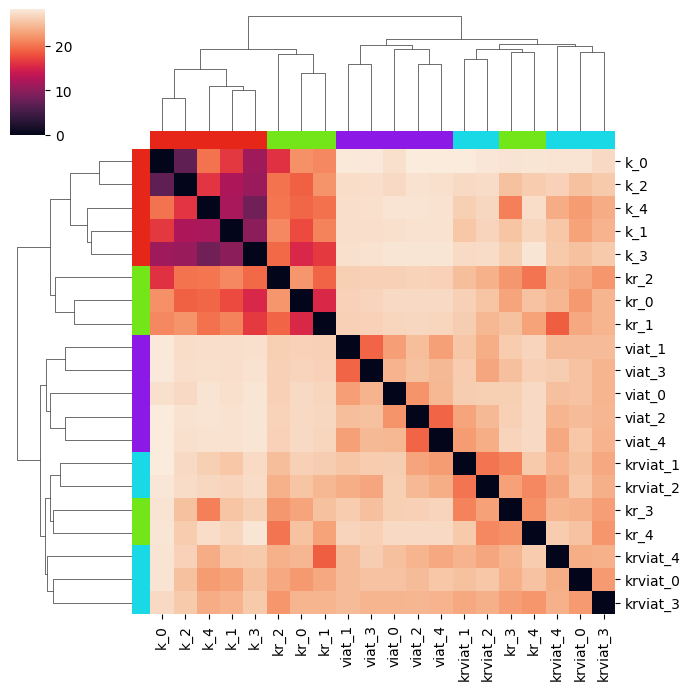

In [4]:
import seaborn as sns

lut = dict(zip(names, sns.hls_palette(len(names), l=0.5, s=0.8)))

lst = []
for i, n in enumerate(names):
    lst += [f"{n}"] * 5

row_colors = pd.DataFrame(lst)[0].map(lut)


sns.clustermap(
    comps_df,
    figsize=(7, 7),
    row_colors=row_colors.to_numpy(),
    col_colors=row_colors.to_numpy(),
)

In [5]:
from disassembly.util import amino_acids

# initialize

exo = 0.25
parameters = {
    "endo": {aa: 1 / len(amino_acids.values()) for aa in amino_acids.values()},
    "exo": exo,
}  # endo is dict of aa at p1

In [6]:
from disassembly.simulate_proteolysis import simulate_proteolysis, enzyme_set, enzyme

# Say we want to estimate parameters for K enzyme.
enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1, 1, 0],  # activities
    [1, 1, 0],  # abundances
)


true_dict, sequence_graph = simulate_proteolysis(
    protein,
    n_start=1,
    n_generate=n_generate,
    endo_or_exo_probability=[0.9, 0.1],
    enzymes=enzymes,
)

 499 / 500 (2761)
168 unique peptides. 501 total


In [7]:
from disassembly.util import normalize_dict
from disassembly.simulate_proteolysis import simulate_proteolysis_no_graph


def generate_guess(parameters, protein):
    """
    Generates a guess from parameters
    """
    for aa in parameters["endo"]:
        parameters["endo"][aa] = max(0, parameters["endo"][aa])
    parameters["exo"] = max(0, parameters["exo"])
    parameters["endo"] = normalize_dict(parameters["endo"])
    parameter_enzyme = enzyme_set([enzyme(parameters["endo"], "")], [1], [1])
    guess  = simulate_proteolysis_no_graph(
        protein,
        parameter_enzyme,
        n_start=1,
        n_generate=n_generate,
        endo_or_exo_probability=[1 - parameters["exo"], parameters["exo"]],
        verbose=False,
    )
    return guess

In [8]:
import random

lr_endo = 0.25
lr_exo = 0.05

best_losses = []
all_losses = []

starting_guess = generate_guess(parameters, protein)
p, q = compare(true_dict, starting_guess)

def update_parameter(parameters, aa, e, verbose=False):
    parameters["endo"][aa] += e
    new_guess = generate_guess(parameters, protein)
    p, q = compare(true_dict, new_guess)
    new_loss = KL(p, q)
    if verbose:
        print(f"\t{aa}: {new_loss:.2f} | {loss_to_beat:.2f}")
    return parameters, new_loss


loss_to_beat = KL(p, q)  # loss for current set of parameters

for i in range(5):
    print(f"Iteration: {i}")

    for aa in parameters["endo"].keys():
        new_parameters, new_loss = update_parameter(
            parameters, aa, lr_endo, verbose=True
        )
        while new_loss < loss_to_beat:
            print(f"{aa} better!")
            diff = loss_to_beat - new_loss
            loss_to_beat = new_loss
            best_losses.append(new_loss)
            parameters, new_loss = update_parameter(
                parameters, aa, lr_endo * diff, verbose=True
            )
        parameters["endo"][aa] -= lr_endo  # this resets the initial guess

    exo_diff = lr_exo * random.choice([-1, 1])
    parameters["exo"] = parameters["exo"] + exo_diff
    new_guess = generate_guess(parameters, protein)
    p, q = compare(true_dict, new_guess)
    new_loss = KL(p, q)
    all_losses.append(new_loss)
    if new_loss > loss_to_beat:
        parameters["exo"] -= exo_diff
    else:
        loss_to_beat = new_loss
        best_losses.append(new_loss)

    print(f" exo: {new_loss:.2f} | {loss_to_beat:.2f}")

Iteration: 0
	V: 13.81 | 13.66
	I: 13.81 | 13.66
	L: 13.81 | 13.66
	E: 13.78 | 13.66
	Q: 13.76 | 13.66
	D: 13.81 | 13.66
	N: 13.07 | 13.66
N better!
	N: 13.81 | 13.07
	H: 12.82 | 13.07
H better!
	H: 13.81 | 12.82
	W: 13.81 | 12.82
	F: 13.73 | 12.82
	Y: 13.44 | 12.82
	R: 13.76 | 12.82
	K: 13.57 | 12.82
	S: 13.81 | 12.82
	T: 11.21 | 12.82
T better!
	T: 13.81 | 11.21
	M: 13.78 | 11.21
	A: 13.81 | 11.21
	G: 13.69 | 11.21
	P: 13.81 | 11.21
	C: 13.81 | 11.21
 exo: 13.81 | 11.21
Iteration: 1
	V: 13.03 | 11.21
	I: 13.81 | 11.21
	L: 13.81 | 11.21
	E: 13.81 | 11.21
	Q: 13.81 | 11.21
	D: 13.69 | 11.21
	N: 13.81 | 11.21
	H: 13.63 | 11.21
	W: 13.81 | 11.21
	F: 13.81 | 11.21
	Y: 13.81 | 11.21
	R: 13.70 | 11.21
	K: 13.51 | 11.21
	S: 13.81 | 11.21
	T: 13.76 | 11.21
	M: 13.69 | 11.21
	A: 13.73 | 11.21
	G: 13.76 | 11.21
	P: 13.76 | 11.21
	C: 13.78 | 11.21
 exo: 11.93 | 11.21
Iteration: 2
	V: 13.58 | 11.21
	I: 13.76 | 11.21
	L: 13.81 | 11.21
	E: 13.78 | 11.21
	Q: 13.78 | 11.21
	D: 13.68 | 11.21
	N: 13.61

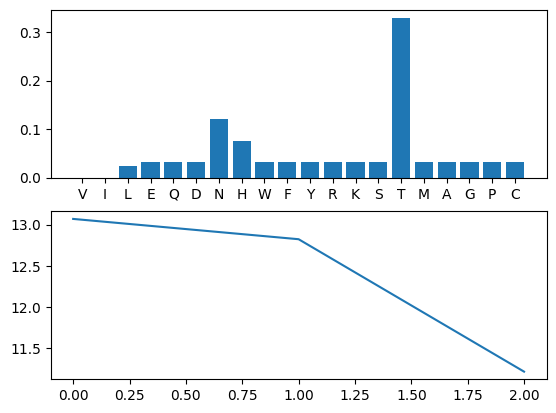

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].bar(parameters["endo"].keys(), parameters["endo"].values())
axs[1].plot(best_losses)

## Turn the parameters into weights

 499 / 500 | 0.95, kl: 0.04, reg: 0.91  | nz: 744 | 

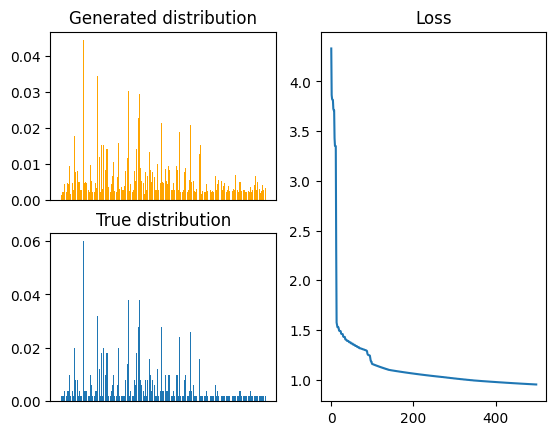

In [10]:
from disassembly.estimate_weights_gd import WeightEstimatorGD
wegd = WeightEstimatorGD(lr=0.1, n_iterations=500, lam=0.1)

G = wegd.run(true_dict, verbose=True, parameters=None)
generated = wegd.generated
losses = wegd.losses
weights = wegd.weights

fig, axs = plt.subplot_mosaic(
    [["generated", "loss"], ["true", "loss"]], width_ratios=[2, 2]
)


axs["true"].bar(true_dict.keys(), [v / sum(true_dict.values()) for v in true_dict.values()])
axs["generated"].bar(
    generated[len(generated.keys()) -1 ].keys(),
    generated[len(generated.keys())-1].values(),
    color="orange",
)
axs["loss"].plot(losses)
axs["true"].set_title("True distribution")
axs["generated"].set_title(f"Generated distribution")
axs["loss"].set_title("Loss")
axs["true"].set_xticks([])
axs["generated"].set_xticks([])
plt.show()

0.8686751192276375

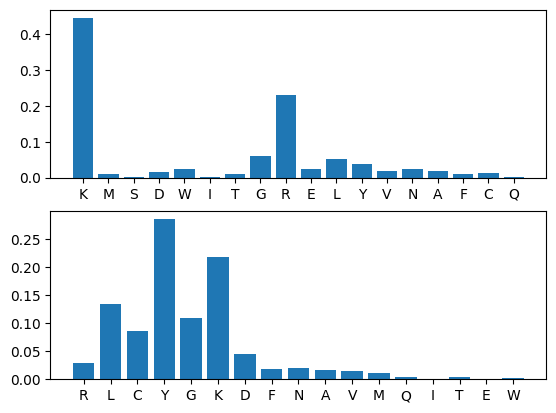

In [11]:
from disassembly.cut_site import get_p1

p1, p1_exo,  exo, endo = get_p1(G, 5000)
fig, axs = plt.subplots(2,1)
axs[0].bar(p1.keys(), height=p1.values())
axs[1].bar(p1_exo.keys(), height=p1_exo.values())
endo/(exo+endo)

In [12]:
from disassembly.disassembly import get_disassembly_indexes_mc
from disassembly.disassembly import get_disassembly

real_disassembly_indexes = get_disassembly_indexes_mc(sequence_graph, N_particles=10000)
get_disassembly(true_dict, real_disassembly_indexes)


 Averaged DI: 3.06


118.19446529480817

In [13]:
mc_di = get_disassembly_indexes_mc(G, 10000)
get_disassembly(true_dict, mc_di)


 Averaged DI: 2.72


27.067261619563215

Text(0.5, 0.98, 'Disassembly indexes')

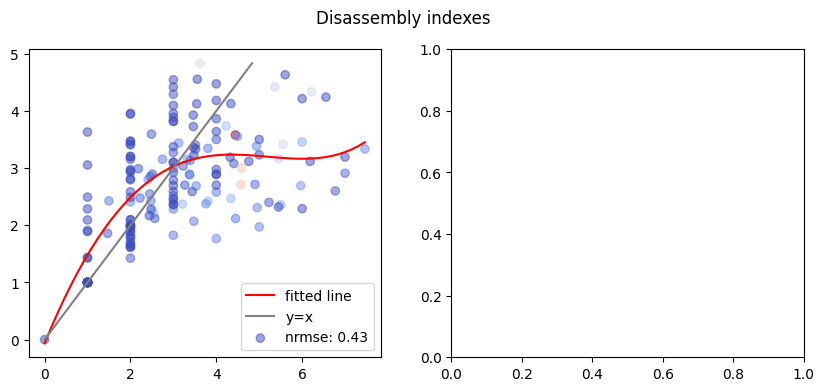

In [14]:
from scipy.stats import linregress
import numpy as np

# fig, axs = plt.subplots(1,3, figsize=(12,4))
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
trues = []
ys_e = []
ys_mc = []
c = []


def get_nrmse(true, observed):
    true = np.array(true)
    observed = np.array(observed)
    rmse = np.sqrt(np.mean((true - observed)**2))
    nrmse = rmse / np.mean(true)
    return nrmse           


for key in true_dict.keys():
    if str(np.mean(mc_di[key])) == "nan":
        print(key)
        continue
    trues.append((real_disassembly_indexes[key]))
    # ys_e.append((estimated_disassembly_indexes[key]))
    ys_mc.append(mc_di[key])
    c.append(true_dict[key])
a = 0
# for xs, ys in [(trues, ys_e), (trues, ys_mc), (ys_e, ys_mc)]:
for xs, ys in [(trues, ys_mc)]:
    regress = np.polyfit(xs, ys, 4)
    nrmse = get_nrmse(xs, ys)
    axs[a].plot(
        np.linspace(0, max(xs)),
        regress[0] * np.linspace(0, max(xs))**4 +
         regress[1] * np.linspace(0, max(xs))**3 +
          regress[2] * np.linspace(0, max(xs))**2 +
           regress[3] * np.linspace(0, max(xs)) +
            regress[4],
        label="fitted line",
        color="red"
    )
    axs[a].plot(
        np.linspace(0, max(ys)), np.linspace(0, max(ys)), color="gray", label="y=x"
    )
    axs[a].scatter(
        xs, ys, label=f"nrmse: {nrmse:.2f}", c=c, cmap="coolwarm", alpha=0.5
    )
    axs[a].legend()
    a += 1

plt.suptitle("Disassembly indexes")